Продолжительность поездки в такси

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [2]:
df = pd.read_csv(r"C:\Users\ktulu\OneDrive\Документы\ML - лабы\data\ForUbung\trip_duration_task.csv")
df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
0,id1080784,2.0,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,400
1,id0889885,1.0,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,1100
2,id0857912,2.0,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,1635
3,id3744273,2.0,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,1141
4,id0232939,1.0,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,848
...,...,...,...,...,...,...,...,...,...,...
729317,id3905982,2.0,2016-05-21 13:29:38,2016-05-21 13:34:34,2,-73.965919,40.789780,-73.952637,40.789181,296
729318,id0102861,1.0,2016-02-22 00:43:11,2016-02-22 00:48:26,1,-73.996666,40.737434,-74.001320,40.731911,315
729319,id0439699,1.0,2016-04-15 18:56:48,2016-04-15 19:08:01,1,-73.997849,40.761696,-74.001488,40.741207,673
729320,id2078912,1.0,2016-06-19 09:50:47,2016-06-19 09:58:14,1,-74.006706,40.708244,-74.013550,40.713814,447


id - идентификатор поездки /n </br>
vendor_id - индентификатор водителя </br>
pickup_datatime - время начала поездки </br>
dropoff_datatime - время окончание поездки </br>
passenger_count - количество пассажиров </br>
pickup_longitude - координаты долготы начала посадки </br>
pickup_latitude - координаты широты начала посадки </br>
dropoff_longitude - координаты долготы конца посадки </br>
dropoff_latitude - координаты широты конца посадки </br>
trip_duration - время поездки(сек)

In [3]:
df.isna().sum()

id                      0
vendor_id            2187
pickup_datetime         0
dropoff_datetime        0
passenger_count         0
pickup_longitude        0
pickup_latitude      1847
dropoff_longitude       0
dropoff_latitude        0
trip_duration           0
dtype: int64

In [4]:
df['vendor_id'].value_counts()

vendor_id
2.0    389291
1.0    337844
Name: count, dtype: int64

Так как у водителя с id '1' меньше выездов, то можно условиться, что пропущенные значения - его.

In [5]:
df['vendor_id'] = df['vendor_id'].fillna(1)
df['vendor_id'] = df['vendor_id'].astype(int)

Исправим тип данных стобцов начала и конца поездок.

In [6]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime']).map(pd.Timestamp.timestamp)
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime']).map(pd.Timestamp.timestamp)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 729322 non-null  object 
 1   vendor_id          729322 non-null  int32  
 2   pickup_datetime    729322 non-null  float64
 3   dropoff_datetime   729322 non-null  float64
 4   passenger_count    729322 non-null  int64  
 5   pickup_longitude   729322 non-null  float64
 6   pickup_latitude    727475 non-null  float64
 7   dropoff_longitude  729322 non-null  float64
 8   dropoff_latitude   729322 non-null  float64
 9   trip_duration      729322 non-null  int64  
dtypes: float64(6), int32(1), int64(2), object(1)
memory usage: 52.9+ MB


In [8]:
df.describe()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,729322.000000,7.293220e+05,7.293220e+05,729322.000000,729322.000000,727475.000000,729322.000000,729322.000000,7.293220e+05
mean,1.533771,1.459509e+09,1.459510e+09,1.662055,-73.973513,40.750917,-73.973422,40.751775,9.522291e+02
std,0.498859,4.454386e+06,4.454424e+06,1.312446,0.069754,0.033608,0.069588,0.036037,3.864626e+03
min,1.000000,1.451606e+09,1.451607e+09,0.000000,-121.933342,34.712234,-121.933304,32.181141,1.000000e+00
25%,1.000000,1.455735e+09,1.455736e+09,1.000000,-73.991859,40.737331,-73.991318,40.735931,3.970000e+02
50%,2.000000,1.459532e+09,1.459533e+09,1.000000,-73.981758,40.754066,-73.979759,40.754509,6.630000e+02
75%,2.000000,1.463296e+09,1.463298e+09,2.000000,-73.967361,40.768311,-73.963036,40.769741,1.075000e+03
max,2.000000,1.467331e+09,1.467414e+09,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06


Заполним пропущенные значения высадки.

In [9]:
group = df.groupby('dropoff_latitude')['pickup_latitude'].transform('median').median()
df['pickup_latitude'] = df['pickup_latitude'].fillna(group)

Выведем строки, в которых кол-во пассажиров равно 0

In [10]:
null_passeger = df.loc[df['passenger_count'] == 0]
null_passeger

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
3572,id3364866,1,1.455372e+09,1.455373e+09,0,-73.990479,40.742004,-73.989243,40.763680,1029
23847,id3485118,1,1.462994e+09,1.462995e+09,0,-73.987572,40.754566,-73.972031,40.762836,981
45987,id2571672,1,1.457242e+09,1.457242e+09,0,-73.979698,40.761196,-73.979698,40.761196,5
76998,id1253169,1,1.456622e+09,1.456622e+09,0,-74.035942,40.736488,-74.035942,40.736492,13
101709,id1220914,2,1.453064e+09,1.453064e+09,0,-73.959999,40.766861,-73.960106,40.766911,48
186050,id3645383,2,1.451624e+09,1.451624e+09,0,-73.993134,40.757473,-73.993294,40.757538,4
186913,id3494250,1,1.459564e+09,1.459565e+09,0,-74.005089,40.729038,-74.032486,40.619579,1121
194926,id1205792,1,1.457700e+09,1.457702e+09,0,-73.982063,40.763798,-74.188072,40.694042,2191
231010,id0959777,2,1.456859e+09,1.456859e+09,0,-74.003777,40.738186,-74.003807,40.738174,4
247692,id2891366,1,1.455831e+09,1.455831e+09,0,-73.983543,40.716404,-73.983543,40.716404,105


Дропаем их, потому что это выброс

In [11]:
df = df.drop(index=null_passeger.index)

Вычислим расстояние в км

In [12]:
del_latidute = (np.pi / 180) * (df['dropoff_latitude'] - df['pickup_latitude'])
mean_latidude = (df['dropoff_latitude'] + df['pickup_latitude']) / 2
del_longitude = (np.pi / 180) * (df['dropoff_longitude'] - df['pickup_longitude'])

distance = pd.DataFrame(6371 * np.sqrt(np.power(del_latidute, 2) + np.power(np.cos(mean_latidude) * del_longitude, 2)))
df['distance'] = distance
df['distance']

0         1.398311
1         4.154444
2         8.069297
3         2.387345
4         4.796296
            ...   
729317    1.476543
729318    0.801279
729319    2.313622
729320    0.976176
729321    7.227685
Name: distance, Length: 729289, dtype: float64

Проверим снова данные.

In [13]:
df.describe()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,distance
count,729289.000000,7.292890e+05,7.292890e+05,729289.000000,729289.000000,729289.000000,729289.000000,729289.000000,7.292890e+05,729289.000000
mean,1.533776,1.459510e+09,1.459511e+09,1.662130,-73.973514,40.750925,-73.973422,40.751776,9.522539e+02,3.932486
std,0.498858,4.454379e+06,4.454417e+06,1.312428,0.069754,0.033564,0.069589,0.036036,3.864708e+03,5.005023
min,1.000000,1.451606e+09,1.451607e+09,1.000000,-121.933342,34.712234,-121.933304,32.181141,1.000000e+00,0.000000
25%,1.000000,1.455735e+09,1.455736e+09,1.000000,-73.991859,40.737400,-73.991318,40.735931,3.970000e+02,1.398742
50%,2.000000,1.459532e+09,1.459533e+09,1.000000,-73.981758,40.754063,-73.979759,40.754509,6.630000e+02,2.357837
75%,2.000000,1.463297e+09,1.463298e+09,2.000000,-73.967361,40.768269,-73.963036,40.769741,1.075000e+03,4.266210
max,2.000000,1.467331e+09,1.467414e+09,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06,1240.955478


In [14]:
df.isna().sum()

id                   0
vendor_id            0
pickup_datetime      0
dropoff_datetime     0
passenger_count      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
trip_duration        0
distance             0
dtype: int64

In [15]:
df.duplicated().sum()

0

## EDA

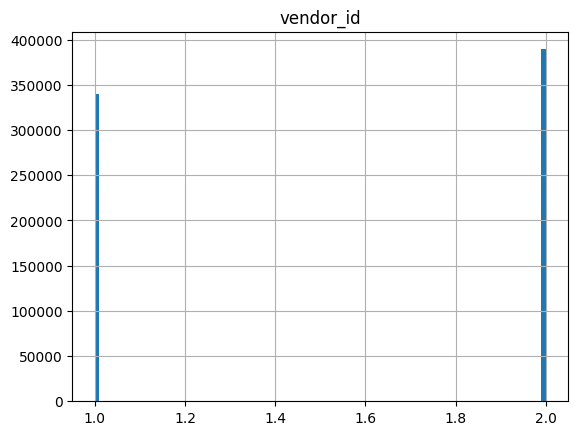

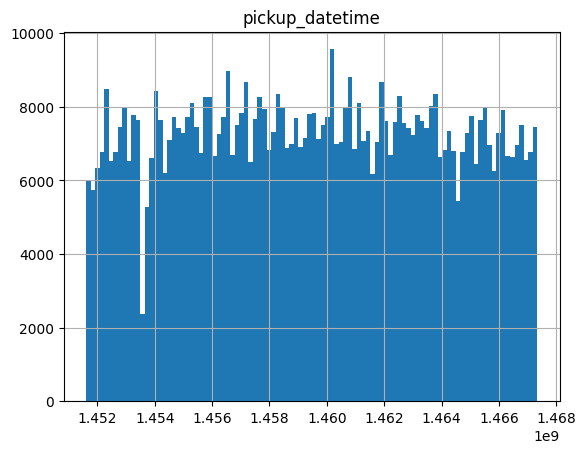

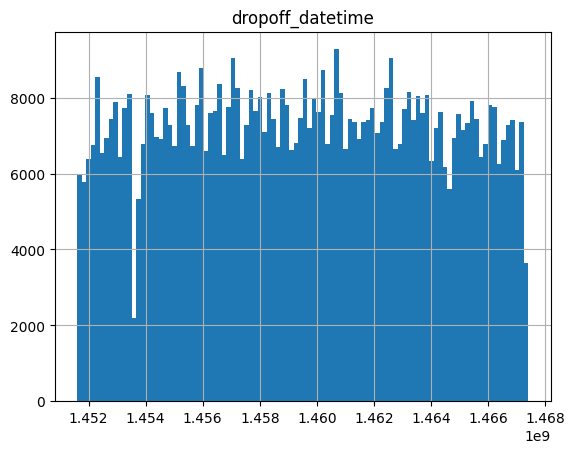

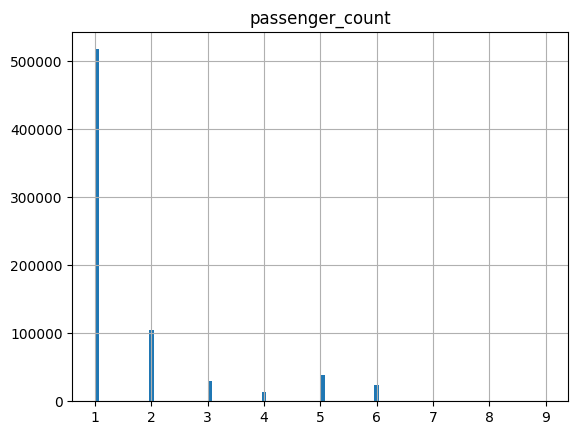

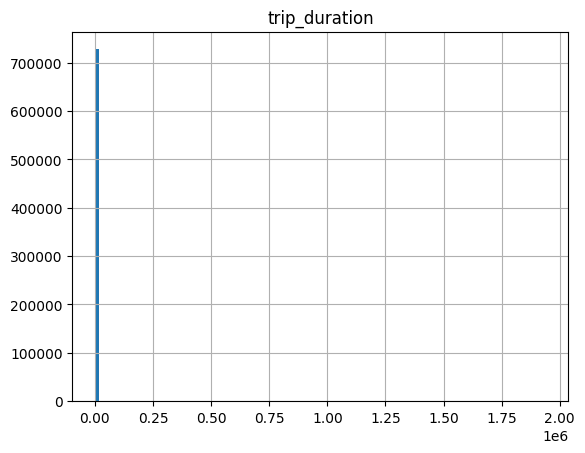

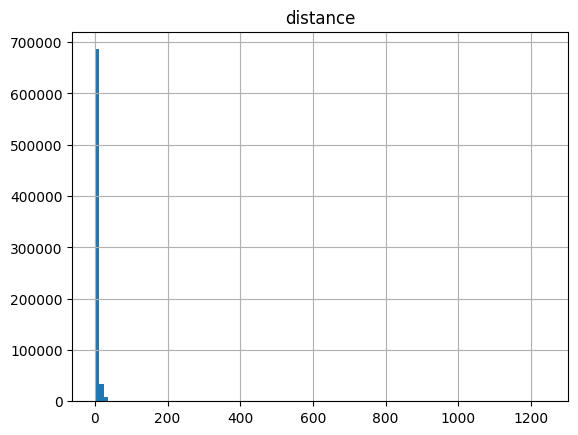

In [16]:
columns = ['vendor_id', 'pickup_datetime', 'dropoff_datetime', 'passenger_count',
            'trip_duration', 'distance']

for column in columns:
    df.hist(column, bins=100)

1) Проанализируем водителей на среднюю продолжительность поездки и средне количество пассажиров.

In [17]:
group_vendors = df.loc[df['vendor_id'] == 1]['passenger_count']
print(group_vendors.mean())
group_vendors = df.loc[df['vendor_id'] == 1]['trip_duration']
group_vendors.mean()


1.261281954754538


837.5614184205264

In [18]:
group_vendors = df.loc[df['vendor_id'] == 2]['passenger_count']
print(group_vendors.mean())
group_vendors = df.loc[df['vendor_id'] == 2]['trip_duration']
group_vendors.mean()

2.012248347577689


1052.4315384674667

2) Покажем гистограмму количества пассажиров.

<BarContainer object of 8 artists>

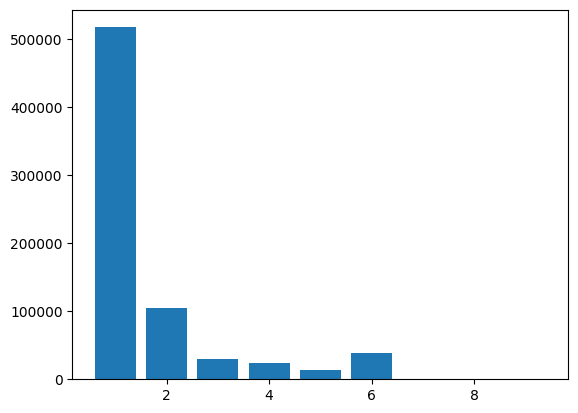

In [19]:
passenger_count = df['passenger_count'].unique()
plt.bar(passenger_count, df['passenger_count'].value_counts())

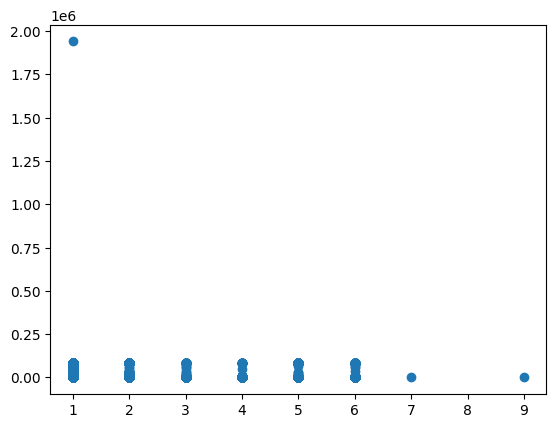

In [20]:
plt.scatter(x=df['passenger_count'], y=df['trip_duration'])

c:\Users\ktulu\OneDrive\Документы\ML - лабы\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ktulu\OneDrive\Документы\ML - лабы\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='passenger_count', ylabel='distance'>

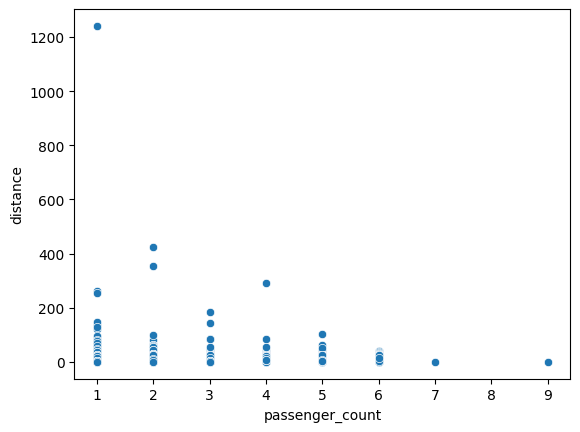

In [21]:
sns.scatterplot(data=df, x=df['passenger_count'], y=df['distance'])

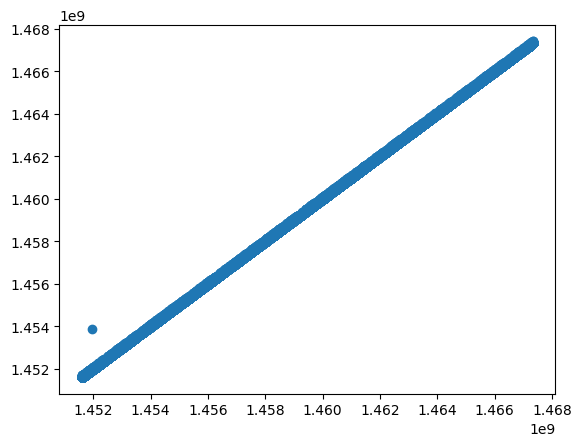

In [22]:
plt.scatter(x=df['pickup_datetime'], y=df['dropoff_datetime'])

Избавление от выбросов

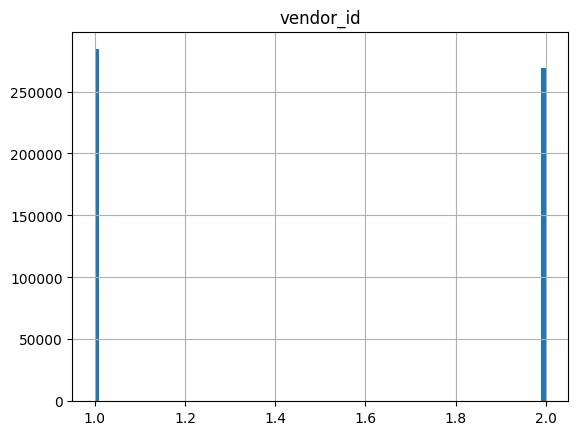

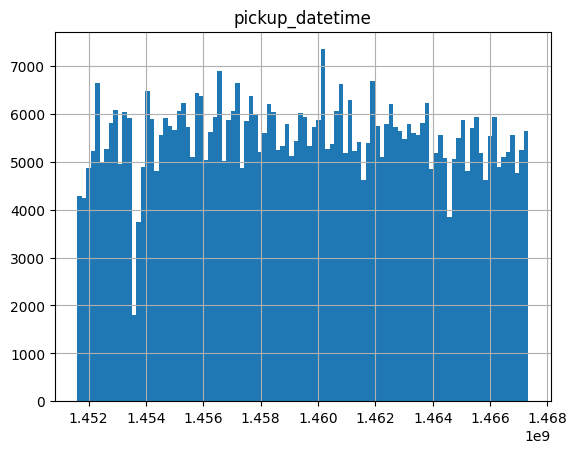

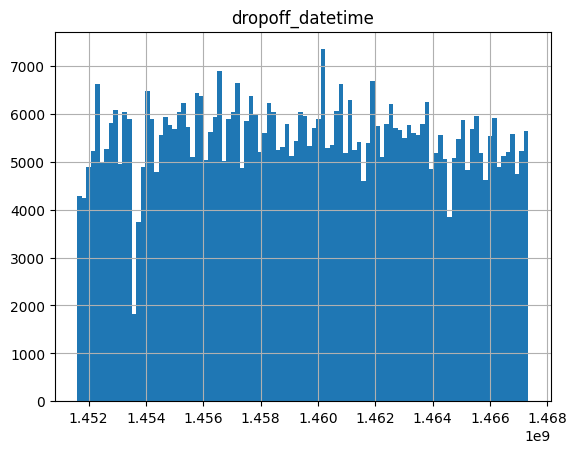

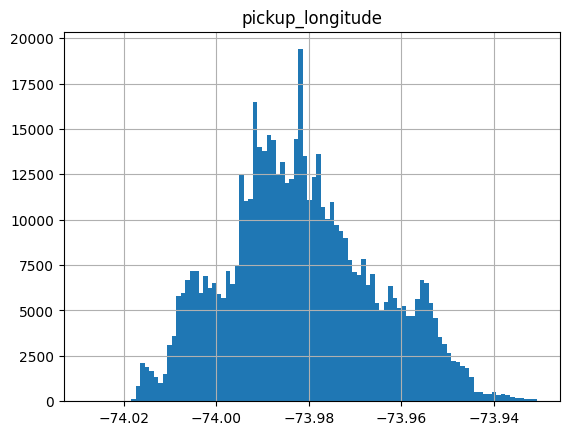

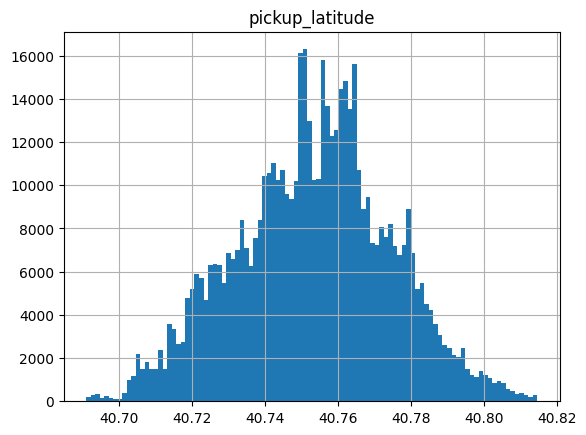

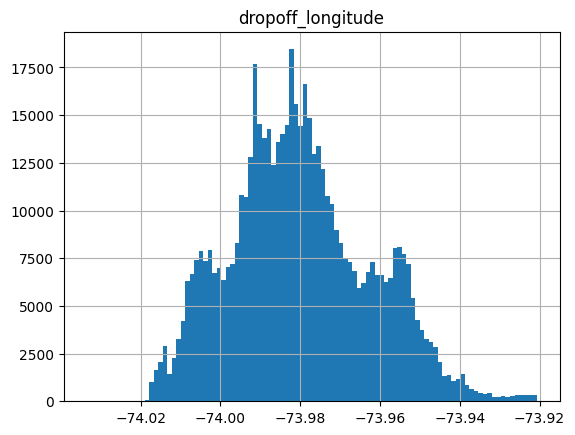

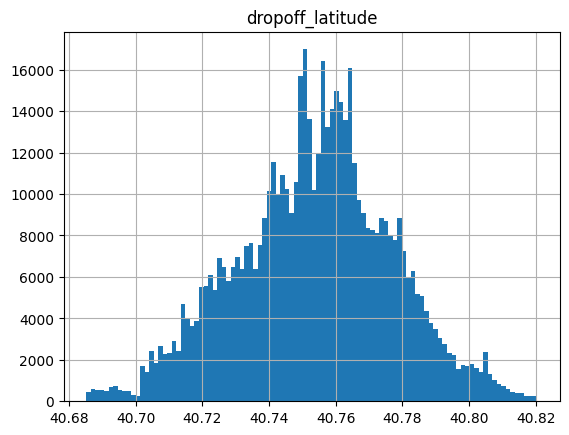

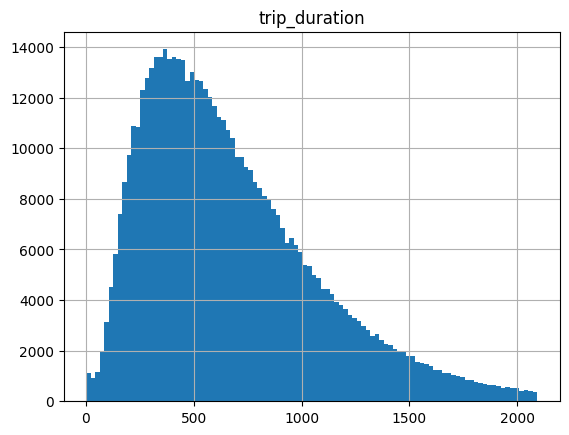

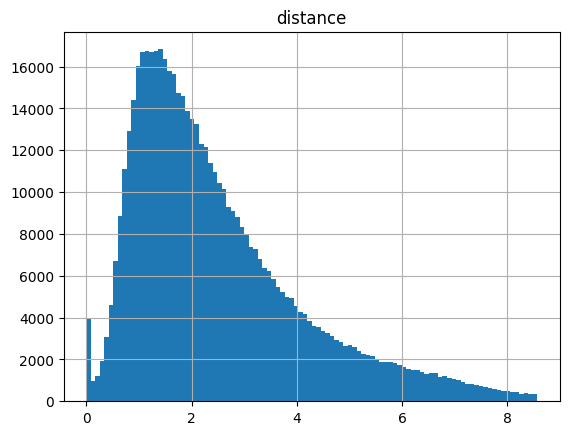

In [23]:
outlier = df[['vendor_id', 'pickup_datetime', 'dropoff_datetime', 'passenger_count',
              'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'trip_duration', 'distance']]
Q1 = outlier.quantile(0.25)
Q3 = outlier.quantile(0.75)
IQR = Q3-Q1
data_filtered = outlier[~((outlier < (Q1 - 1.5 * IQR)) | (outlier > (Q3 + 1.5 * IQR))).any(axis=1)]

index_list = list(data_filtered.index.values)
data_filtered = df[df.index.isin(index_list)]
df = data_filtered

columns = ['vendor_id', 'pickup_datetime', 'dropoff_datetime',
              'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'trip_duration', 'distance']

for column in columns:
    df.hist(column, bins=100)

3) Рассмотрим корреляции

<function matplotlib.pyplot.show(close=None, block=None)>

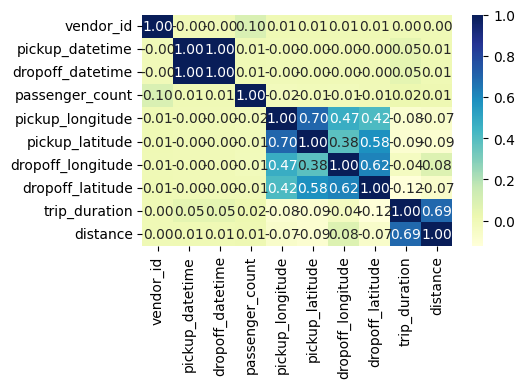

In [24]:
df_ohne_id = df.drop('id', axis=1)
correlation_matrix = df_ohne_id.corr()
plt.figure(figsize=(5,3))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", fmt=".2f")
plt.show

Как видно из тепловой карты долгота и ширина посадки находятся в хорошей корреляции. Про время нет смысла говорить, ведь в спять оно не повернёт, поэтому тут очевидна 100% корреляция. Остальные признаки между собой абсолютно не скоррелированы.

In [25]:
Y = df['trip_duration']
for x_pearson in df_ohne_id.columns.to_list():
  pearson_coef, p_value = stats.pearsonr(df[x_pearson], Y)
  print(x_pearson)
  print('Коэффициент корреляции Пирсона = ', pearson_coef, ' P-значение = ', p_value)
  print('')

vendor_id
Коэффициент корреляции Пирсона =  0.004273337402610454  P-значение =  0.0014820210927533487

pickup_datetime
Коэффициент корреляции Пирсона =  0.05057965103763826  P-значение =  4.5589681029948e-310

dropoff_datetime
Коэффициент корреляции Пирсона =  0.05066958679246281  P-значение =  3.6440714811536e-311

passenger_count
Коэффициент корреляции Пирсона =  0.022322124230554977  P-значение =  6.576529746837087e-62

pickup_longitude
Коэффициент корреляции Пирсона =  -0.0845686890041598  P-значение =  0.0

pickup_latitude
Коэффициент корреляции Пирсона =  -0.08691336073980274  P-значение =  0.0

dropoff_longitude
Коэффициент корреляции Пирсона =  -0.037557868923419696  P-значение =  8.154967864311977e-172

dropoff_latitude
Коэффициент корреляции Пирсона =  -0.12099968878552092  P-значение =  0.0

trip_duration
Коэффициент корреляции Пирсона =  1.0  P-значение =  0.0

distance
Коэффициент корреляции Пирсона =  0.6911500790018861  P-значение =  0.0



Все переменные хорошо взаимосвязаны с целевой переменной.

## Задание 3

1) Для простой линейной регрессии

In [26]:
import joblib
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error, r2_score
from math import sqrt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [27]:
lm = LinearRegression()

Разобьём все даннные на учебную и тестируемую

In [28]:
X = df[['distance']]
Y = df[['trip_duration']]

Возьмём за Y - 'trip_duration', а за X - 'pickup_latitude', так как коэффициент Пирсона здесь минимален среди остальных признаков.

In [29]:
X_train_SimpleRegression =  joblib.load(r'C:\Users\ktulu\OneDrive\Документы\ML - лабы\data\ForModels\X_train_SimpleRegression.csv')
X_test_SimpleRegression = joblib.load(r'C:\Users\ktulu\OneDrive\Документы\ML - лабы\data\ForModels\X_test_SimpleRegression.csv')
y_train_SimpleRegression = joblib.load(r'C:\Users\ktulu\OneDrive\Документы\ML - лабы\data\ForModels\y_train_SimpleRegression.csv')
y_test_SimpleRegression = joblib.load(r'C:\Users\ktulu\OneDrive\Документы\ML - лабы\data\ForModels\y_test_SimpleRegression.csv')

Для начала сделаем простую линейную регрессию для всех признаков и проверим их метриками

In [30]:
Input = [('standardscaler', StandardScaler()), 
         ('model', LinearRegression()),]
pipeline = Pipeline(Input)

SimpleRegression = joblib.load(r'C:\Users\ktulu\OneDrive\Документы\ML - лабы\models\SimpleRegression_Ubung3.joblib')

y_predict_SimpleRegression = SimpleRegression.predict(X_test_SimpleRegression)

print('MSE = ', 
      mean_squared_error(y_test_SimpleRegression, y_predict_SimpleRegression), 
      '\nR^2= ',
      r2_score(y_test_SimpleRegression, y_predict_SimpleRegression),
      '\nMAE = ',
        mean_absolute_error(y_test_SimpleRegression, y_predict_SimpleRegression),
      '\nMAPE = ',
      mean_absolute_percentage_error(y_test_SimpleRegression, y_predict_SimpleRegression),
      '\nRMSE = ',
      sqrt(mean_squared_error(y_test_SimpleRegression, y_predict_SimpleRegression)) 
      )
# SimpleRegression.coef_

MSE =  1.32500757034501e-15 
R^2=  1.0 
MAE =  3.1360381489203114e-08 
MAPE =  8.144940997844778e-11 
RMSE =  3.640065343294005e-08


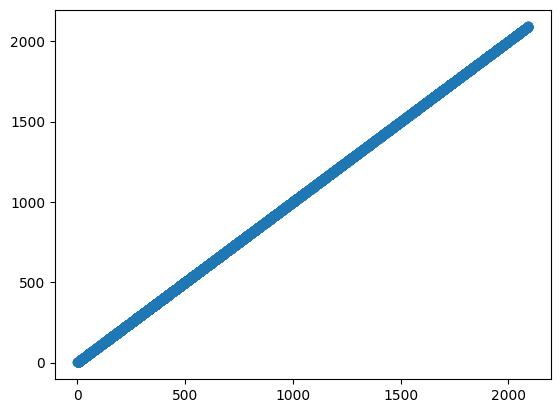

In [31]:
plt.scatter(x=y_test_SimpleRegression, y=y_predict_SimpleRegression)
plt.plot(y_test_SimpleRegression, y_predict_SimpleRegression)

Как мы можем заметить, наша модель предсказывает чуть лучше обычного рандома, поэтому мы добавим регулязаторы L1 и L2

Будем рандомить гиперпарметры для экономии времени

In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
parameters = {'alpha': np.arange(0, 1, 0.1)}

In [34]:
Ridge_SimpleRegression_optimal = joblib.load(r'C:\Users\ktulu\OneDrive\Документы\ML - лабы\models\Ridge_SimpleRegression_Ubung3.joblib')
Ridge_SimpleRegression = Lasso(
                               alpha=Ridge_SimpleRegression_optimal.best_params_['alpha']
                               ).fit(X_train_SimpleRegression, y_train_SimpleRegression)
y_predict_Ridge_SimpleRegression = Ridge_SimpleRegression.predict(X_test_SimpleRegression)
print(f'MAE: {mean_absolute_error(y_test_SimpleRegression, y_predict_Ridge_SimpleRegression)}')
print(f'MSE: {mean_squared_error(y_test_SimpleRegression, y_predict_Ridge_SimpleRegression)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test_SimpleRegression, y_predict_Ridge_SimpleRegression))}')
print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_test_SimpleRegression, y_predict_Ridge_SimpleRegression))}')
print(f'R^2: {Ridge_SimpleRegression.score(X_test_SimpleRegression, y_predict_Ridge_SimpleRegression)}')
Ridge_SimpleRegression_optimal.best_params_

# joblib.dump(Ridge_SimpleRegression_optimal, r'C:\Users\ktulu\OneDrive\Документы\ML - лабы\models\Ridge_SimpleRegression_Ubung3.joblib')

c:\Users\ktulu\OneDrive\Документы\ML - лабы\venv\Lib\site-packages\sklearn\base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\Users\ktulu\OneDrive\Документы\ML - лабы\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(


MAE: 214.6731972741525
MSE: 82347.11673571508
RMSE: 286.9618733137123
MAPE: 0.723030905061762
R^2: 1.0


c:\Users\ktulu\OneDrive\Документы\ML - лабы\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.818e+10, tolerance: 7.117e+06 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


{'alpha': 0.0}

plt.scatter(x=y_test_SimpleRegression, y=y_predict_Ridge_SimpleRegression)
plt.plot(y_test_SimpleRegression, y_predict_Ridge_SimpleRegression)

In [35]:
Lasso_SimpleLinearRegression_optimal = joblib.load(r'C:\Users\ktulu\OneDrive\Документы\ML - лабы\models\Lasso_LinearRegression_Ubung3.joblib')
Lasso_SimpleLinearRegression = Lasso(
    alpha=Lasso_SimpleLinearRegression_optimal.best_params_['alpha']
).fit(X_train_SimpleRegression, y_train_SimpleRegression)

y_predict_Lasso_SimpleLinearRegression = Lasso_SimpleLinearRegression.predict(X_test_SimpleRegression)
print(f'MAE: {mean_absolute_error(y_test_SimpleRegression, y_predict_Lasso_SimpleLinearRegression)}')
print(f'MSE: {mean_squared_error(y_test_SimpleRegression, y_predict_Lasso_SimpleLinearRegression)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test_SimpleRegression, y_predict_Lasso_SimpleLinearRegression))}')
print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_test_SimpleRegression, y_predict_Lasso_SimpleLinearRegression))}')
print(f'R^2: {Lasso_SimpleLinearRegression.score(X_test_SimpleRegression, y_predict_Lasso_SimpleLinearRegression)}')
Lasso_SimpleLinearRegression_optimal.best_params_

MAE: 217.44132124859374
MSE: 83894.57066723323
RMSE: 289.64559493842336
MAPE: 0.7316220565166945
R^2: 1.0


c:\Users\ktulu\OneDrive\Документы\ML - лабы\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.859e+10, tolerance: 7.117e+06
  model = cd_fast.enet_coordinate_descent(


{'alpha': 0.9}

2) Для множественной линейной регрессии

In [36]:
X = df.drop(['trip_duration', 'id'], axis=1)
Y = df[['trip_duration']]

X_train_LinearRegression =  joblib.load(r'C:\Users\ktulu\OneDrive\Документы\ML - лабы\data\ForModels\X_train_LinearRegression.csv')
X_test_LinearRegression = joblib.load(r'C:\Users\ktulu\OneDrive\Документы\ML - лабы\data\ForModels\X_test_LinearRegression.csv')
y_train_LinearRegression = joblib.load(r'C:\Users\ktulu\OneDrive\Документы\ML - лабы\data\ForModels\y_train_LinearRegression.csv')
y_test_LinearRegression = joblib.load(r'C:\Users\ktulu\OneDrive\Документы\ML - лабы\data\ForModels\y_test_LinearRegression.csv')


In [37]:

LinRegression = LinearRegression()
LinRegression.fit(X_train_LinearRegression, y_train_LinearRegression)
y_pred_LinearRegression = LinRegression.predict(X_test_LinearRegression)

print('MSE = ', 
      mean_squared_error(y_test_LinearRegression, y_pred_LinearRegression), 
      '\nR^2= ',
      r2_score(y_test_LinearRegression,y_pred_LinearRegression),
      '\nMAE = ',
        mean_absolute_error(y_test_LinearRegression, y_pred_LinearRegression),
      '\nMAPE = ',
      mean_absolute_percentage_error(y_test_LinearRegression, y_pred_LinearRegression),
      '\nRMSE = ',
      sqrt(mean_squared_error(y_test_LinearRegression, y_pred_LinearRegression)) 
      )

MSE =  1.5049195245079244e-14 
R^2=  1.0 
MAE =  1.1736476081965407e-07 
MAPE =  3.076346090536329e-10 
RMSE =  1.2267516148381157e-07


In [38]:
# Ridge_LinearRegression_optimal = GridSearchCV(Ridge(), parameters).fit(X_train_LinearRegression, y_train_LinearRegression)
Ridge_LinearRegression_optimal = joblib.load(r'C:\Users\ktulu\OneDrive\Документы\ML - лабы\models\Ridge_LinearRegression_Ubung3.joblib')
Ridge_LinearRegression = Ridge(
    alpha=Ridge_LinearRegression_optimal.best_params_['alpha']
).fit(X_train_SimpleRegression, y_train_LinearRegression)
y_predict_Ridge_LinearRegression = Ridge_LinearRegression.predict(X_test_LinearRegression)
print(f'MAE: {mean_absolute_error(y_test_LinearRegression, y_predict_Ridge_LinearRegression)}')
print(f'MSE: {mean_squared_error(y_test_LinearRegression, y_predict_Ridge_LinearRegression)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test_LinearRegression, y_predict_Ridge_LinearRegression))}')
print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_test_LinearRegression, y_predict_Ridge_LinearRegression))}')
print(f'R^2: {Ridge_LinearRegression.score(X_test_LinearRegression, y_predict_Ridge_LinearRegression)}')
Ridge_LinearRegression_optimal.best_params_
# joblib.dump(Ridge_LinearRegression_optimal, r'C:\Users\ktulu\OneDrive\Документы\ML - лабы\models\Ridge_LinearRegression_Ubung3.joblib')

MAE: 319.2669895511994
MSE: 160759.30328176622
RMSE: 400.9480057086782
MAPE: 1.0142704174307593
R^2: 1.0


c:\Users\ktulu\OneDrive\Документы\ML - лабы\venv\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.55082e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


{'alpha': 0.6000000000000001}

In [39]:
Lasso_LinearRegression_optimal = joblib.load(r'C:\Users\ktulu\OneDrive\Документы\ML - лабы\models\Lasso_LinearRegression_Ubung3.joblib')
# Lasso_LinearRegression_optimal = GridSearchCV(Lasso(), parameters).fit(X_train_SimpleRegression, y_train_LinearRegression)
Lasso_LinearRegression = Lasso(
    alpha=Lasso_LinearRegression_optimal.best_params_['alpha']
).fit(X_train_SimpleRegression, y_train_LinearRegression)
y_predict_Lasso_LinearRegression = Lasso_LinearRegression.predict(X_test_LinearRegression)
print(f'MAE: {mean_absolute_error(y_test_LinearRegression, y_predict_Lasso_LinearRegression)}')
print(f'MSE: {mean_squared_error(y_test_LinearRegression, y_predict_Lasso_LinearRegression)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test_LinearRegression, y_predict_Lasso_LinearRegression))}')
print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_test_LinearRegression, y_predict_Lasso_LinearRegression))}')
print(f'R^2: {Lasso_LinearRegression.score(X_test_LinearRegression, y_predict_Lasso_LinearRegression)}')
Lasso_LinearRegression_optimal.best_params_
# joblib.dump(Lasso_LinearRegression_optimal, r'C:\Users\ktulu\OneDrive\Документы\ML - лабы\models\Lasso_LinearRegression_Ubung3.joblib')

MAE: 319.3655220663977
MSE: 160837.5788402341
RMSE: 401.0456069329698
MAPE: 1.014359447304939
R^2: 1.0


c:\Users\ktulu\OneDrive\Документы\ML - лабы\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.403e+10, tolerance: 7.126e+06
  model = cd_fast.enet_coordinate_descent(


{'alpha': 0.9}

## Задание 4 - Полимиальная регрессия с Lasso и Ridge

In [40]:
from sklearn.preprocessing import PolynomialFeatures

p = PolynomialFeatures(2)

X_p = p.fit_transform(X)

X_train_PolimeanRegression =  X_train_LinearRegression
X_test_PolimeanRegression = X_test_LinearRegression
y_train_PolimeanRegression = y_train_LinearRegression
y_test_PolimeanRegression = y_test_LinearRegression


In [41]:
PolimeanRegression = LinearRegression().fit(X_train_PolimeanRegression, y_train_PolimeanRegression)
y_predict_PolimeanRegression = PolimeanRegression.predict(X_test_PolimeanRegression)
print(f'MAE: {mean_absolute_error(y_test_PolimeanRegression, y_predict_PolimeanRegression)}')
print(f'MSE: {mean_squared_error(y_test_PolimeanRegression, y_predict_PolimeanRegression)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test_PolimeanRegression, y_predict_PolimeanRegression))}')
print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_test_PolimeanRegression, y_predict_PolimeanRegression))}')
print(f'R^2: {r2_score(y_test_PolimeanRegression, y_predict_PolimeanRegression)}')

MAE: 1.1736476081965407e-07
MSE: 1.5049195245079244e-14
RMSE: 1.2267516148381157e-07
MAPE: 1.753951564478429e-05
R^2: 1.0


C:\Users\ktulu\AppData\Local\Temp\ipykernel_9684\397973190.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.distplot(y_test_PolimeanRegression, hist=False, color='Red', label='Actual values')
c:\Users\ktulu\OneDrive\Документы\ML - лабы\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ktulu\OneDrive\Документы\ML - лабы\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a

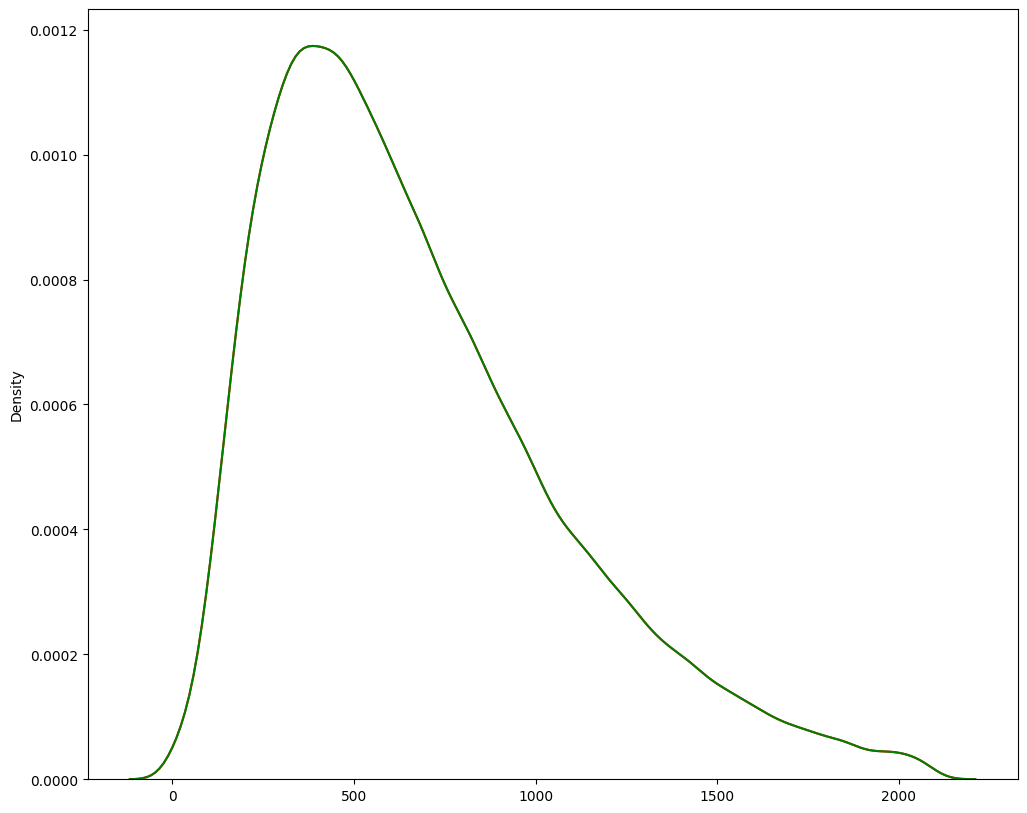

In [42]:
plt.figure(figsize=(12,10))
ax2 = sns.distplot(y_test_PolimeanRegression, hist=False, color='Red', label='Actual values')
sns.distplot(y_predict_PolimeanRegression, hist=False, color='Green', label='Predicted values')
plt.show()

In [43]:
Ridge_PolinomeanRegression = Ridge(alpha=Ridge_LinearRegression_optimal.best_params_['alpha']).fit(X_train_PolimeanRegression, y_train_PolimeanRegression)
y_predict_Ridge_PolinomeanRegression = Ridge_PolinomeanRegression.predict(X_test_PolimeanRegression)
print(f'MAE: {mean_absolute_error(y_test_PolimeanRegression, y_predict_Ridge_PolinomeanRegression)}')
print(f'MSE: {mean_squared_error(y_test_PolimeanRegression, y_predict_Ridge_PolinomeanRegression)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test_PolimeanRegression, y_predict_Ridge_PolinomeanRegression))}')
print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_test_PolimeanRegression, y_predict_Ridge_PolinomeanRegression))}')
print(f'R^2: {Ridge_PolinomeanRegression.score(X_test_PolimeanRegression, y_predict_Ridge_PolinomeanRegression)}')

MAE: 0.0003580345147175245
MSE: 2.280947299959444e-07
RMSE: 0.00047759264022380457
MAPE: 0.0009381364361984825
R^2: 1.0


c:\Users\ktulu\OneDrive\Документы\ML - лабы\venv\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.55445e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [44]:
Lasso_PolinomeanRegression = Ridge(alpha=Lasso_LinearRegression_optimal.best_params_['alpha']).fit(X_train_PolimeanRegression, y_train_PolimeanRegression)
y_predict_Lasso_PolinomeanRegression = Lasso_PolinomeanRegression.predict(X_test_PolimeanRegression)
print(f'MAE: {mean_absolute_error(y_test_PolimeanRegression, y_predict_Lasso_PolinomeanRegression)}')
print(f'MSE: {mean_squared_error(y_test_PolimeanRegression, y_predict_Lasso_PolinomeanRegression)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test_PolimeanRegression, y_predict_Lasso_PolinomeanRegression))}')
print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_test_PolimeanRegression, y_predict_Lasso_PolinomeanRegression))}')
print(f'R^2: {Lasso_PolinomeanRegression.score(X_test_PolimeanRegression, y_predict_Lasso_PolinomeanRegression)}')

MAE: 0.00034594910085445946
MSE: 2.1297299443399002e-07
RMSE: 0.00046148997219223523
MAPE: 0.0009221340854391044
R^2: 1.0


c:\Users\ktulu\OneDrive\Документы\ML - лабы\venv\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.56964e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


## По итогам всех моделей, лучшей модулью с наименьшими ошибками и лучшим коэффициентов детерминации является множественная линейная регрессия

## Задание 7. Метрики

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X = df.drop(['trip_duration', 'id'], axis=1)
Y = df[['trip_duration']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

ln = LinearRegression().fit(X_train, y_train)

y_pipe = ln.predict(X_test)

$ MAE=\frac{1}{m}{\sum_{i=1}^{m}|y_i-\hat{y}_i|} $

In [47]:
def mae(y_actual: pd.DataFrame, y_predict: np.ndarray):
    return (np.sum(np.abs(y_actual.values - y_predict)) / y_actual.count()).values[0]

print('MAE = ', mean_absolute_error(y_test, y_pipe))
print(mae(y_test, y_pipe))


MAE =  2.5413623416724575e-09
2.5413623416724575e-09


$ MSE=\frac{1}{m}{\sum_{i=1}^{m}(y_i-\hat{y}_i)^2} $

In [48]:
def mse(y_actual: pd.DataFrame, y_predict: np.ndarray):
    return (np.sum(np.power(y_actual.values - y_predict, 2)) / y_actual.count()).values[0]

print('MSE = ', mean_squared_error(y_test, y_pipe))
print(mse(y_test, y_pipe))

MSE =  6.4585408938239844e-18
6.4585408938239844e-18


$ RMSE=\sqrt{\frac{1}{m}{\sum_{i=1}^{m}(y_i-\hat{y}_i)^2}} $

In [49]:
def rmse(y_actual: pd.DataFrame, y_predict: np.ndarray):
    return np.sqrt((np.sum(np.power(y_actual.values - y_predict, 2)) / y_actual.count())).values[0]

print('RMSE = ', np.sqrt(mean_squared_error(y_test, y_pipe)))
print(rmse(y_test, y_pipe))

RMSE =  2.5413659503943904e-09
2.5413659503943904e-09


$ MAPE=\frac{1}{m}\sum_{i=1}^{m}{|\frac{y_i-\hat{y}_i}{y_i}|} $

In [50]:
def mape(y_actual: pd.DataFrame, y_predict: np.ndarray):
    return (np.sum(np.abs((y_actual.values - y_predict) / y_actual)) / y_actual.count()).values[0]

print('RMSE = ', mean_absolute_percentage_error(y_test, y_pipe))
print(mape(y_test, y_pipe))

RMSE =  6.611640291263341e-12
6.611640291263341e-12


c:\Users\ktulu\OneDrive\Документы\ML - лабы\venv\Lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


$ R^2=1-\frac{MSE}{\frac{1}{m}{\sum_{i=1}^{m}(y_i-\bar{y})^2}} $. $\bar{y}$

In [51]:
def r2(y_actual: pd.DataFrame, y_predict: np.ndarray):
    return (1 - (mean_squared_error(y_actual, y_predict) * y_actual.mean() / (np.sum(np.power(y_actual.values - y_predict.mean(), 2)) / y_actual.count()))).values[0]

print('R2 = ', r2_score(y_test, y_pipe))
print(r2(y_test, y_pipe))

R2 =  1.0
1.0


## Задание 8 - ElasticNet

In [52]:
from sklearn.linear_model import ElasticNet

In [53]:
X = df.drop(['trip_duration', 'id'], axis=1)
Y = df[['trip_duration']]

X_train_ElasticNet =  X_train_LinearRegression
X_test_ElasticNet = X_test_LinearRegression
y_train_ElasticNet = y_train_LinearRegression
y_test_ElasticNet = y_test_LinearRegression

param_grid = {'alpha': [0.2, 0.4, 0.6, 0.8, 1],
              'l1_ratio': [1]}

In [54]:
base_elastic_model = ElasticNet()

ElasticNet_Regression = joblib.load(r'C:\Users\ktulu\OneDrive\Документы\ML - лабы\models\ElasticNetRegression_Ubung3.joblib')
y_predict_ElasticNet = ElasticNet_Regression.predict(X_test_ElasticNet)
ElasticNet_Regression.best_params_

{'alpha': 0.2, 'l1_ratio': 1}

In [55]:
print(f'MAE: {mean_absolute_error(y_test_ElasticNet, y_predict_ElasticNet)}')
print(f'MSE: {mean_squared_error(y_test_ElasticNet, y_predict_ElasticNet)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test_ElasticNet, y_predict_ElasticNet))}')
print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_test_ElasticNet, y_predict_ElasticNet))}')
print(f'R^2: {Ridge_PolinomeanRegression.score(X_test_ElasticNet, y_predict_ElasticNet)}')

MAE: 215.14101544876806
MSE: 82176.91210687344
RMSE: 286.6651567715781
MAPE: 0.729037457371747
R^2: -0.055877520309732365


## Задание 10* - Реализовать линейную регрессию и один из регуляризаторов

In [60]:
type(X_test_ElasticNet.to_list())

AttributeError: 'DataFrame' object has no attribute 'to_list'